In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
df_user_with_residence = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main.csv')
df_user_with_residence = df_user_with_residence.drop('Unnamed: 0', 1)
df_user_with_residence.head()

,USER,ANTENNA_ID,PRESUMED_RESIDENCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
1,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
2,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
3,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5
4,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5


In [3]:
antennas_with_id = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/antenas_with_id.csv', index_col=0)
antennas_with_id.sample(5)

,ID,ANTENNA,CITY,LAT,LONG,ANTENNA_ID
17,15777,23441,São João del-Rei,-21.10707,-44.21979,SJDR1
25,18035,53561,Tiradentes,-21.11886,-44.16478,TR1
48,51893,50911,Tiradentes,-21.11886,-44.16478,TR1
10,5826,27711,Madre de Deus de Minas,-21.48194,-44.33039,MDM
45,51822,48581,Madre de Deus de Minas,-21.48194,-44.33039,MDM


In [4]:
antennas_with_id.groupby(['ANTENNA_ID']).min().reset_index()

,ANTENNA_ID,ID,ANTENNA,CITY,LAT,LONG
0,LD1,14448,49592,Lagoa Dourada,-20.92802,-44.08333
1,MDM,4593,27451,Madre de Deus de Minas,-21.48194,-44.33039
2,RT,16547,51601,Ritápolis,-21.02604,-44.32029
3,SJDR1,4706,23441,São João del-Rei,-21.10707,-44.21979
4,SJDR2,4707,23461,São João del-Rei,-21.12699,-44.26144
5,SJDR3,5483,23471,São João del-Rei,-21.08391,-44.23300
6,SJDR4,6666,23451,São João del-Rei,-21.13140,-44.24749
7,SJDR5,14626,50141,São João del-Rei,-21.13589,-44.25834
8,ST,30226,51371,São Tiago,-20.91224,-44.50842
9,SVM,17493,60761,São Vicente de Minas,-21.70206,-44.44245


In [5]:
antennas_and_lat_long = antennas_with_id.groupby('ANTENNA_ID').agg({'LAT': min, 'LONG':min}).reset_index()
antennas_and_lat_long.tail()

,ANTENNA_ID,LAT,LONG
7,SJDR5,-21.13589,-44.25834
8,ST,-20.91224,-44.50842
9,SVM,-21.70206,-44.44245
10,TR1,-21.11886,-44.16478
11,TR2,-21.11760,-44.18130


# Calculando a distância entre as antenas

In [6]:
def dist(x, y):
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(y[0])
    lon2 = radians(y[1])
    
    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return round(distance, 4)

In [7]:
distances = pdist(antennas_and_lat_long[['LAT', 'LONG']].values, metric=dist)

points = antennas_and_lat_long['ANTENNA_ID'].values

result = pd.DataFrame(squareform(distances), columns=points, index=points)

result

,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
LD1,0.0000,66.7267,26.9171,24.4415,28.8400,23.2851,28.3236,29.4062,44.2006,93.7940,22.8496,23.4121
MDM,66.7267,0.0000,50.7205,43.2435,40.1224,45.4089,39.9257,39.2085,66.0024,27.0885,43.8808,43.3709
RT,26.9171,50.7205,0.0000,13.7858,12.7824,11.1147,13.9437,13.8070,23.2815,76.2509,19.1602,17.6587
SJDR1,24.4415,43.2435,13.7858,0.0000,4.8565,2.9181,3.9477,5.1259,36.9841,70.0825,5.8567,4.1621
SJDR2,28.8400,40.1224,12.7824,4.8565,0.0000,5.6277,1.5282,1.0409,35.0451,66.6546,10.0698,8.3804
SJDR3,23.2851,45.4089,11.1147,2.9181,5.6277,0.0000,5.4921,6.3515,34.3890,72.0973,8.0764,6.5441
SJDR4,28.3236,39.9257,13.9437,3.9477,1.5282,5.4921,0.0000,1.2315,36.4444,66.6074,8.6942,7.0370
SJDR5,29.4062,39.2085,13.8070,5.1259,1.0409,6.3515,1.2315,0.0000,35.9583,65.7973,9.8902,8.2480
ST,44.2006,66.0024,23.2815,36.9841,35.0451,34.3890,36.4444,35.9583,0.0000,88.1171,42.4416,40.9318
SVM,93.7940,27.0885,76.2509,70.0825,66.6546,72.0973,66.6074,65.7973,88.1171,0.0000,70.9562,70.4098


In [8]:
melt_df = pd.melt(result.reset_index(), id_vars='index')
melt_df.rename(columns={'index': 'ANTENNA_ID', 'variable': 'PRESUMED_RESIDENCE', 'value': 'DISTANCE'}, inplace=True)

melt_df

,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
0,LD1,LD1,0.0000
1,MDM,LD1,66.7267
2,RT,LD1,26.9171
3,SJDR1,LD1,24.4415
4,SJDR2,LD1,28.8400
...,...,...,...
139,SJDR5,TR2,8.2480
140,ST,TR2,40.9318
141,SVM,TR2,70.4098
142,TR1,TR2,1.7198


In [9]:
df_main = pd.merge(df_user_with_residence, melt_df, left_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'], right_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'])
df_main.sample(10)

,USER,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
353253,0582D6CC7193475B4FF7E02232BC80AD,SJDR4,SJDR4,0.0
401824,61FCBDEC6949199DAB4969F2A8E3FF5F,SJDR4,SJDR4,0.0
385747,437A1F63D63016AC3EB3DCE688E34D55,SJDR4,SJDR4,0.0
328440,BBA235B2553F06BF26001C8E0F522D09,SVM,SVM,0.0
237332,AEE57774C907ED85829369C268E005E8,SJDR1,SJDR1,0.0
424487,8CC617DD946B73A4924EFA54EA1845D4,SJDR4,SJDR4,0.0
458680,CF272B2FD2000DFFEDE19D69C8559895,SJDR4,SJDR4,0.0
421422,86C87EE5A1E89792B27AD9E68F334C95,SJDR4,SJDR4,0.0
236339,AC6C9849C62A6862A381DF426223A04D,SJDR1,SJDR1,0.0
46547,F330CEC74C1BEC98875FD3E0ABAF1560,SJDR5,SJDR5,0.0


In [10]:
df_final = df_main.groupby(['USER', 'PRESUMED_RESIDENCE']).agg({'ANTENNA_ID': list, 'DISTANCE': sum}).reset_index()
df_final.rename(columns={'ANTENNA_ID':'CALL_LOC', 'DISTANCE': 'TRAVELLED_DISTANCE'}, inplace=True)
df_final.head(3)

,USER,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,"[SJDR5, SJDR5, SJDR5, SJDR5, SJDR5]",0.0
1,000579E8BA1DA9E5292392473BCCCD2A,LD1,"[LD1, LD1, LD1, LD1, LD1, LD1, LD1]",0.0
2,0008962B966EF6C5571DF03F5C786677,SJDR2,"[SJDR2, SJDR2, SJDR2, SJDR2, SJDR2, SJDR2, SJD...",0.0


# Medidas de Posição e Dispersão

In [11]:
df_without_0 = df_final.loc[df_final['TRAVELLED_DISTANCE']>0]
df_with_0 = df_final

df_median_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_without_0 = df_median_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEDIAN'})

df_median_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).median()
df_median_with_0 = df_median_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEDIAN'})

df_mean_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_without_0 = df_mean_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_MEAN'})

df_mean_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).mean()
df_mean_with_0 = df_mean_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_MEAN'})

df_std_without_0 = df_without_0.groupby(['PRESUMED_RESIDENCE']).std()
df_std_without_0 = df_std_without_0.rename(columns={'TRAVELLED_DISTANCE': 'HIGHER_STD'})

df_std_with_0 = df_with_0.groupby(['PRESUMED_RESIDENCE']).std()
df_std_with_0 = df_std_with_0.rename(columns={'TRAVELLED_DISTANCE': 'LOWER_STD'})

In [12]:
from functools import reduce

dfs = [df_mean_with_0, df_mean_without_0, df_median_with_0, df_median_without_0, df_std_with_0, df_std_without_0]

result = pd.concat(dfs, join='outer', axis=1)

In [13]:
labels = result.index.values

lower_mean = np.round(result.LOWER_MEAN.values, 2)
higher_mean = np.round(result.HIGHER_MEAN.values,2)

lower_median = np.round(result.LOWER_MEDIAN.values, 2)
higher_median = np.round(result.HIGHER_MEDIAN.values,2)

lower_std = np.round(result.LOWER_STD.values, 2)
higher_std = np.round(result.HIGHER_STD.values,2)

In [14]:
def mean_geral_values(arrays):
    geral_values = []
    for array in arrays:
        geral_values.append(np.mean(array))
    return geral_values

In [15]:
geral_values = [lower_mean, higher_mean, lower_median, higher_median, lower_std, higher_std]
values = mean_geral_values(geral_values)

df = pd.DataFrame([values], columns=['LOWER_MEAN','HIGHER_MEAN', 'LOWER_MEDIAN', 'HIGHER_MEDIAN', 'LOWER_STD',
                                   'HIGHER_STD'], index=['GENERAL_MEDIAN'])
result = result.append(df)
result

,LOWER_MEAN,HIGHER_MEAN,LOWER_MEDIAN,HIGHER_MEDIAN,LOWER_STD,HIGHER_STD
LD1,5.236195,83.418006,0.000000,56.647200,30.989497,93.869177
MDM,3.934221,87.290530,0.000000,50.720500,23.120949,68.183780
RT,0.201074,49.971624,0.000000,38.320400,4.027932,40.267001
SJDR1,4.895261,17.341648,0.000000,7.895400,22.814300,40.352804
SJDR2,5.658781,14.704662,0.000000,5.897400,18.720220,27.890430
SJDR3,4.333439,22.958562,0.000000,8.410200,23.191096,49.250142
SJDR4,3.287092,23.195218,0.000000,5.492100,23.031921,57.295146
SJDR5,3.056248,16.028908,0.000000,5.125900,16.675803,35.374264
ST,23.657100,100.542675,0.000000,94.989100,53.643558,70.995249
SVM,10.653164,148.544621,0.000000,131.594600,49.625365,117.790950


In [16]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

No handles with labels found to put in legend.


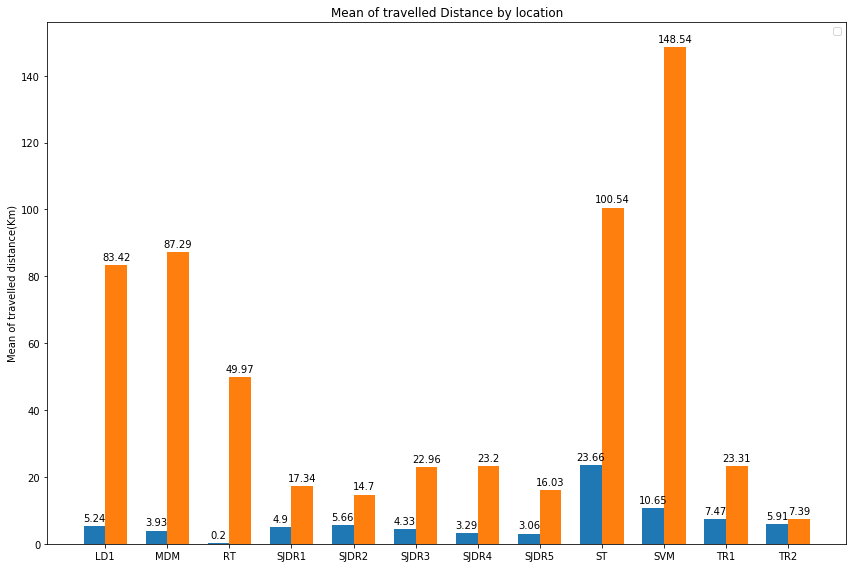

In [17]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Mean of travelled distance(Km)')
ax.set_title('Mean of travelled Distance by location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_mean, width, label='Lower Mean')
rects2 = ax.bar(x + width/2, higher_mean, width, label='Higher Mean')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

No handles with labels found to put in legend.


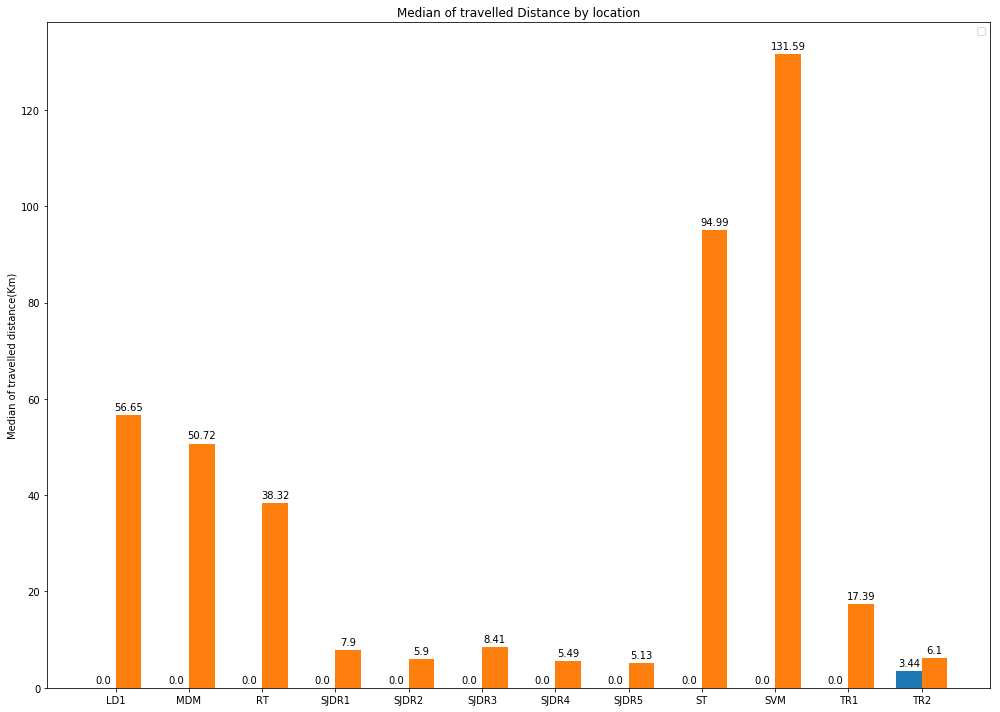

In [18]:
fig, ax = plt.subplots(figsize=(14,10))

ax.set_ylabel('Median of travelled distance(Km)')
ax.set_title('Median of travelled Distance by location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_median, width, label='Lower Mean')
rects2 = ax.bar(x + width/2, higher_median, width, label='Higher Mean')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

No handles with labels found to put in legend.


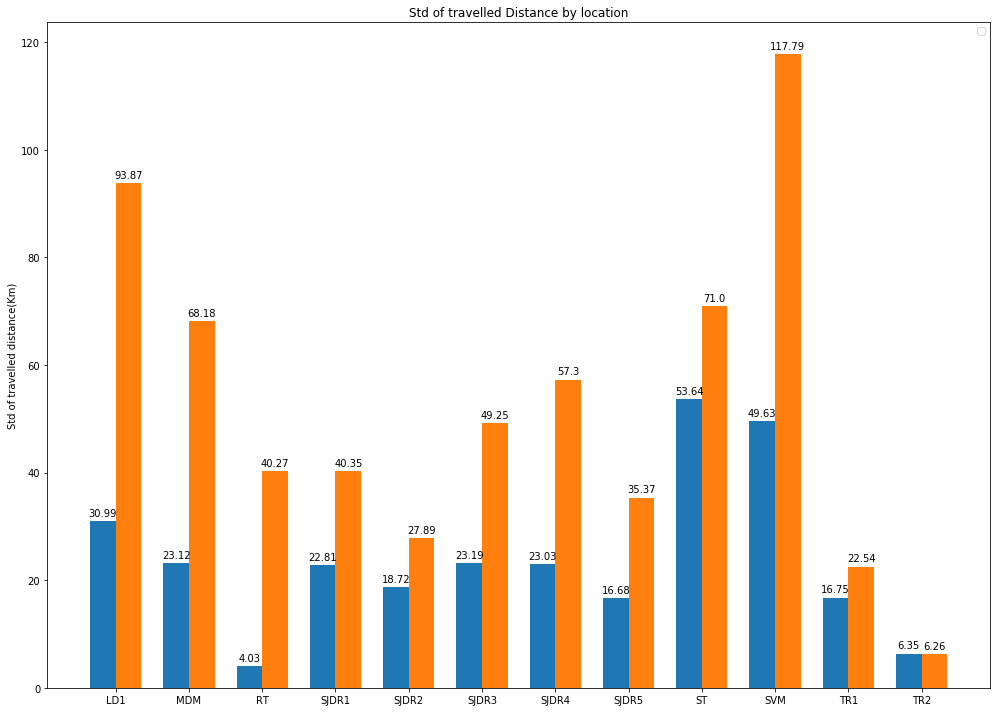

In [19]:
fig, ax = plt.subplots(figsize=(14,10))

ax.set_ylabel('Std of travelled distance(Km)')
ax.set_title('Std of travelled Distance by location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects1 = ax.bar(x - width/2, lower_std, width, label='Lower Mean')
rects2 = ax.bar(x + width/2, higher_std, width, label='Higher Mean')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

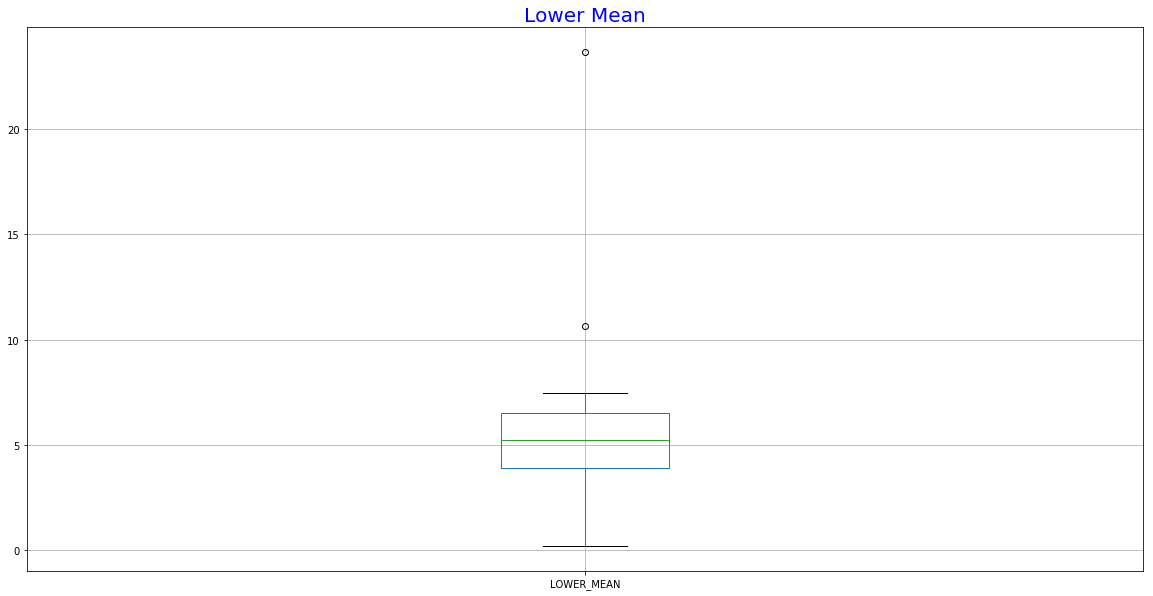

In [20]:
plt.figure(figsize=(20,10))                                      #ajustando o frame
result.LOWER_MEAN.plot(kind='box')                          #plot do gráfico tipo boxplot
plt.title('Lower Mean',fontsize=20, color='blue')  #título do gráfico
plt.grid()

# Distribuição da série de distância percorrida por região

In [27]:
df_sd = df_final[['PRESUMED_RESIDENCE', 'TRAVELLED_DISTANCE']]
df_new = df_sd.groupby('PRESUMED_RESIDENCE').agg({'TRAVELLED_DISTANCE':list})
df_new.TRAVELLED_DISTANCE.plot(kind='box')

TypeError: no numeric data to plot